<a href="https://colab.research.google.com/github/yasaswinik12/HepatitisC-prediction/blob/main/ML_Project_Hepatitis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **I. Importing Essential Libraries**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **II. Reading the CSV file (dataset)**



In [2]:
df = pd.read_csv('/content/drive/MyDrive/HepatitisCdata.csv')
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [3]:
#removing Unnamed: 0 column
df.drop("Unnamed: 0", axis=1, inplace=True)

#Shape of the dataset
df.shape

(615, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [5]:
df.Category.unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [6]:
#finding missing values
df.isna().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [7]:
#filling the missing values with mean of the columns)
df.fillna(df.mean(),inplace=True)


#Information about the columns
df.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.775920,25.643955,25.448940,33.090690,19.673150,2.205657,1.123466,49.756166,54.661071,5.398234
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.950000,16.400000,21.600000,5.300000,6.935000,4.620000,67.000000,15.700000,69.300000
50%,47.000000,41.900000,66.700000,23.000000,25.900000,7.300000,8.260000,5.310000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,79.300000,33.050000,32.900000,11.200000,9.590000,6.055000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


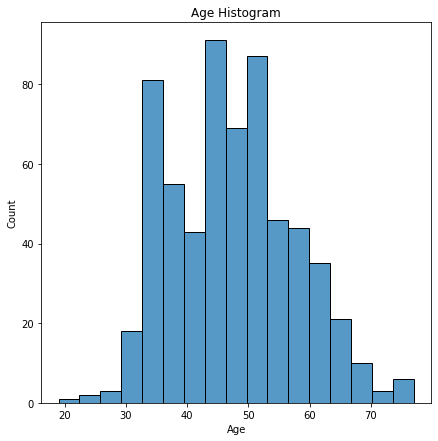

In [8]:
#Understanding column Age
plt.figure(figsize=(7,7))
plt.title('Age Histogram')
sns.histplot(df['Age'])

plt.show()

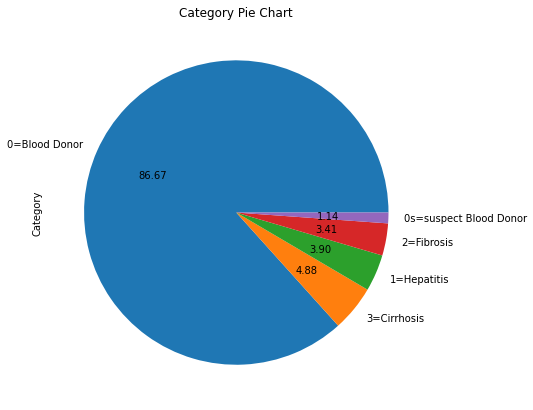

0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64

In [9]:
#understanding the target column
plt.figure(figsize=(7,7))
df['Category'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Category Pie Chart')
plt.show()

df['Category'].value_counts()

In [10]:
#replacing category values into numerics
replace_dict = dict()
num_dict = dict()
i=0
for val in df['Category'].unique():
    replace_dict[val] = i
    num_dict[str(i)] = val
    i += 1

In [11]:
df['Category'].replace(replace_dict,inplace=True)
df.Category.unique()

array([0, 1, 2, 3, 4])

In [12]:
df['Sex'].value_counts()

m    377
f    238
Name: Sex, dtype: int64

In [13]:
df['Sex'].replace(['m','f'],[1,0],inplace=True)
df['Sex'].value_counts()

1    377
0    238
Name: Sex, dtype: int64

In [14]:
x = df.drop('Category',axis=1)
y = df['Category']

In [15]:
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

from tensorflow import keras

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## **III. Oversampling the data using SMOTE method**


In [16]:
smote = SMOTE()
X,Y = smote.fit_resample(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [17]:
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)
X.columns = x.columns

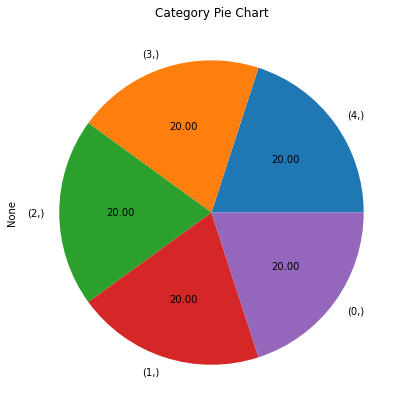

4    533
3    533
2    533
1    533
0    533
dtype: int64

In [18]:
#Balanced dataset
plt.figure(figsize=(7,7))
Y.value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Category Pie Chart')
plt.show()
Y.value_counts()

# **IV. Feature scaling**


In [19]:
cols_to_scale = X.drop('Sex',axis=1).columns
cols_to_scale

Index(['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT',
       'PROT'],
      dtype='object')

In [20]:
scale = MinMaxScaler()
scalled = scale.fit_transform(X[cols_to_scale])

In [21]:
i = 0
for col in cols_to_scale:
    X[col] = scalled[:,i]
    i += 1

In [22]:
X.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0.224138,1.0,0.350669,0.101653,0.020962,0.036694,0.026461,0.367578,0.218447,0.091495,0.011757,0.535398
1,0.224138,1.0,0.350669,0.145571,0.052713,0.044990,0.012243,0.650434,0.408981,0.061619,0.017172,0.701327
2,0.224138,1.0,0.475483,0.156427,0.108816,0.134014,0.020932,0.494997,0.457524,0.072822,0.044400,0.763274
3,0.224138,1.0,0.420505,0.100419,0.091554,0.038290,0.071485,0.394263,0.401699,0.067221,0.045328,0.683628
4,0.224138,1.0,0.361070,0.154947,0.097719,0.045310,0.034755,0.515677,0.350728,0.063486,0.039295,0.528761


# **V. Train Test Split**


In [23]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1865, 12), (800, 12), (1865, 1), (800, 1))

# **VI. Model Fitting**

# **Logistic Regression**

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn import metrics

lr = OneVsOneClassifier(LogisticRegression())

lr.fit(x_train,y_train)

Y_pred_lr = lr.predict(x_test)
LogisticRegressionScore = lr.score(x_test, y_test)
print("Accuracy obtained by Logistic Regression model:",LogisticRegressionScore*100)
print(metrics.classification_report(y_test, Y_pred_lr))

Accuracy obtained by Logistic Regression model: 87.125
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       162
           1       0.99      1.00      1.00       154
           2       0.77      0.78      0.77       157
           3       0.80      0.87      0.84       164
           4       0.95      0.87      0.91       163

    accuracy                           0.87       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.87      0.87      0.87       800



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# **Gaussian Naive Bayes**

In [25]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train,y_train)

Y_pred_nb = nb.predict(x_test)
GaussianNBScore = nb.score(x_test, y_test)
print("Accuracy obtained by Gaussian Naive Bayes model:",GaussianNBScore*100)
print(metrics.classification_report(y_test, Y_pred_nb))

Accuracy obtained by Gaussian Naive Bayes model: 83.75
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       162
           1       0.99      1.00      0.99       154
           2       0.72      0.64      0.68       157
           3       0.76      0.74      0.75       164
           4       0.97      0.87      0.91       163

    accuracy                           0.84       800
   macro avg       0.84      0.84      0.84       800
weighted avg       0.84      0.84      0.84       800



/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# **Support Vector Machine classifier**

In [26]:
from sklearn.svm import SVC

sv = OneVsOneClassifier(SVC())
sv.fit(x_train, y_train)
Y_pred_svm = sv.predict(x_test)
SVMScore = sv.score(x_test, y_test)
print("Accuracy obtained by Support Vector Machine model:",SVMScore*100)
print(metrics.classification_report(y_test, Y_pred_svm))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy obtained by Support Vector Machine model: 93.5
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       162
           1       1.00      1.00      1.00       154
           2       0.87      0.89      0.88       157
           3       0.86      0.91      0.89       164
           4       0.99      0.94      0.96       163

    accuracy                           0.94       800
   macro avg       0.94      0.94      0.94       800
weighted avg       0.94      0.94      0.94       800



# **Random Forest Classifier**

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
Y_pred_rfc = rfc.predict(x_test)
RandomForestClassifierScore = rfc.score(x_test,y_test)
print("Accuracy obtained by Random Forest Classifier :", RandomForestClassifierScore*100)
print(metrics.classification_report(y_test, Y_pred_rfc))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy obtained by Random Forest Classifier : 99.0
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       162
           1       1.00      1.00      1.00       154
           2       0.99      0.99      0.99       157
           3       0.96      0.99      0.98       164
           4       0.99      0.98      0.99       163

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800



# **K Nearest Neighbors**

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
Y_pred_knn = knn.predict(x_test)
KNeighborsClassifierScore = knn.score(x_test, y_test)
print("Accuracy obtained by K Neighbors Classifier :", KNeighborsClassifierScore*100)
print(metrics.classification_report(y_test, Y_pred_knn))

Accuracy obtained by K Neighbors Classifier : 96.375
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       162
           1       1.00      1.00      1.00       154
           2       0.93      0.98      0.95       157
           3       0.93      0.99      0.96       164
           4       0.98      0.98      0.98       163

    accuracy                           0.96       800
   macro avg       0.97      0.96      0.96       800
weighted avg       0.97      0.96      0.96       800



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


# **Decision Tree Classifier**

In [29]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_pred_tree = tree.predict(x_test)
DecisionTreeClassifierScore = tree.score(x_test,y_test)
print("Accuracy obtained by Decision Tree Classifier :", DecisionTreeClassifierScore*100)
print(metrics.classification_report(y_test, y_pred_tree))

Accuracy obtained by Decision Tree Classifier : 95.75
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       162
           1       0.99      0.99      0.99       154
           2       0.93      0.96      0.95       157
           3       0.94      0.95      0.94       164
           4       0.96      0.93      0.94       163

    accuracy                           0.96       800
   macro avg       0.96      0.96      0.96       800
weighted avg       0.96      0.96      0.96       800



# **Artificial Neural Network model**

In [30]:
model = keras.Sequential([
    keras.layers.Dense(12,input_shape=(12,),activation='relu'),
    keras.layers.Dense(5,activation='softmax')
])
print(model.summary())


model.compile(
    optimizer='adam',
    metrics=['accuracy'],
    loss='sparse_categorical_crossentropy'
)
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=200,batch_size=128)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                156       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 65        
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
15/15 [==============================] - 1s 19ms/step - loss: 1.6053 - accuracy: 0.2182 - val_loss: 1.5775 - val_accuracy: 0.2375
Epoch 2/200
15/15 [==============================] - 0s 5ms/step - loss: 1.5816 - accuracy: 0.2166 - val_loss: 1.5558 - val_accuracy: 0.2387
Epoch 3/200
15/15 [==============================] - 0s 5ms/step - loss: 1.5577 - accuracy: 0.2386 - val_loss: 1.5320 - val_accuracy: 0.3038
Epoch 4/200
15/15 [==============================] - 0s 5ms/step - loss: 1.5324 - accuracy:

In [31]:
test_loss, NNScore = model.evaluate(x_test,y_test)
print("Accuracy obtained by Neural Network model :", NNScore*100)

25/25 [==============================] - 0s 3ms/step - loss: 0.3228 - accuracy: 0.9112
Accuracy obtained by Neural Network model : 91.12499952316284


In [32]:
def predict(model,x):
    pred = model.predict(x)
    pred_test = np.array([np.argmax(pred[i]) for i in range(len(pred))])
    return pred_test

def plot_actual_vs_predicted(y_true,y_pred):
    print("Classification Report")
    print(classification_report(y_true,y_pred))

In [33]:
y_test_pred = predict(model,x_test)
plot_actual_vs_predicted(y_test,y_test_pred)

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       162
           1       1.00      1.00      1.00       154
           2       0.84      0.84      0.84       157
           3       0.85      0.88      0.87       164
           4       0.96      0.91      0.93       163

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800



# **VII. Models comparison**

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


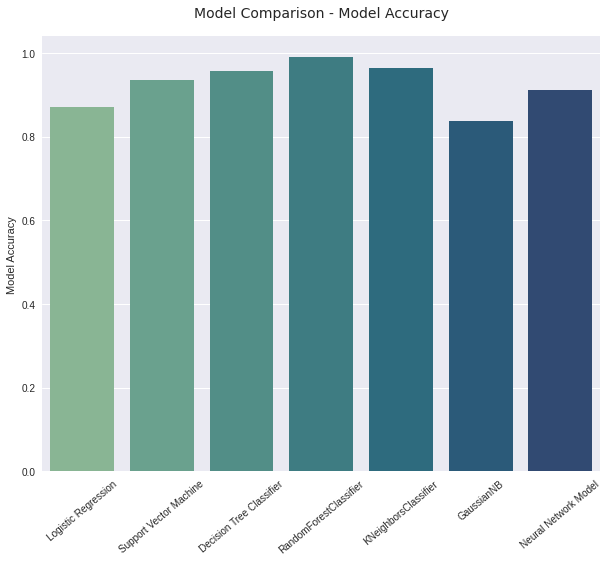

In [34]:
plt.style.use("seaborn")

x = ["Logistic Regression", 
     "Support Vector Machine",
     "Decision Tree Classifier", 
     "RandomForestClassifier", 
     "KNeighborsClassifier", 
     "GaussianNB",
     "Neural Network Model"
     ]

y = [LogisticRegressionScore, 
     SVMScore,
     DecisionTreeClassifierScore, 
     RandomForestClassifierScore, 
     KNeighborsClassifierScore, 
     GaussianNBScore,
     NNScore
    ]

fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=x,y=y, palette="crest");
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40)
plt.title("Model Comparison - Model Accuracy", fontsize=14, fontname="Helvetica", y=1.03);

Among the models, Random Forest classifier gave a better accuracy of 99.75